# 15.4 Case Study: Time Series and Simple Linear Regression 
### Loading the Average High Temperatures into a `DataFrame` 

**We added `%matplotlib inline` to enable Matplotlib in this notebook.**

In [ ]:
%matplotlib inline
import pandas as pd

In [ ]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [ ]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [ ]:
nyc.Date = nyc.Date.floordiv(100)

In [ ]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Splitting the Data for Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
     random_state=11)

In [ ]:
X_train.shape

(93, 1)

In [ ]:
X_test.shape

(31, 1)

### Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_regression = LinearRegression()

In [ ]:
linear_regression.fit(X=X_train, y=y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
linear_regression.coef_

array([0.01939167])

In [ ]:
linear_regression.intercept_

np.float64(-0.30779820252656975)

### Testing the Model

In [ ]:
predicted = linear_regression.predict(X_test)

In [ ]:
expected = y_test

In [ ]:
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Predicting Future Temperatures and Estimating Past Temperatures 

In [ ]:
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

In [ ]:
predict(2019)

array([38.84399018])

In [ ]:
predict(1890)

array([36.34246432])

### Visualizing the Dataset with the Regression Line

In [ ]:
import seaborn as sns

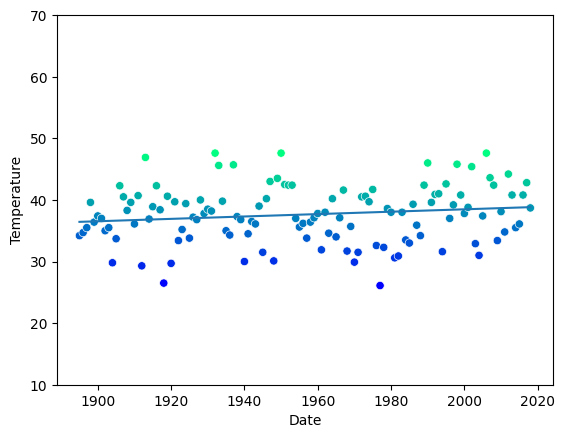

In [ ]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt 

line = plt.plot(x, y)

In [ ]:
# This placeholder cell was added because we had to combine 
# the sections snippets 22-28 for the visualization to work in Jupyter
# and want the subsequent snippet numbers to match the book

In [ ]:
# Placeholder cell 

In [ ]:
# Placeholder cell 

In [ ]:
# Placeholder cell 

In [ ]:
# Placeholder cell 

In [ ]:
# Placeholder cell 

![Self Check Exercises check mark image](files/art/check.png)
## 15.4 Self Check
**1. _(Fill-In)_** A `LinearRegression` object’s `________` and `________` attributes can be used as _m_ and _b_, respectively, in the equation _y = mx + b_ to make predictions. 

**Answer:** `coeff_`, `intercept_`.

**2. _(True/False)_** By default, the `LinearRegression` estimator performs simple linear regression.

**Answer:** False. By default, the `LinearRegression` estimator uses all the numeric features in a dataset, performing a multiple linear regression.

**3. _(IPython Session)_** Use the predict lambda to estimate what the average January high temperature was in `1889` and to predict what it will be in `2020`.

**Answer:** 

In [ ]:
predict(1889)

array([36.32307265])

In [ ]:
predict(2020)

array([38.86338185])

In [ ]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################
